# Decoder Test

In [1]:
from sys import path 
path.append('C:/Users/Noah/Documents/GitHub/THzCAI/vecap/')
import decoder as dec 
import skrf as rf
from skrf.media  import Freespace   
import numpy.random
from pylab import *

    
# create a freespace Calibration template 
delta = 40
freq =rf.N('C:/Users/Noah/Desktop/8x8/0/ds,0.s1p').frequency
air = Freespace(frequency = freq, z0=50)
ideals = [ air.delay_short(k*delta,'um',name='ds,%i'%k) for k in range(5)]
cal_template = rf.OnePort(measured = ideals, ideals = ideals, 
                 sloppy_input=True, is_reciprocal=False)

c=dec.Decoder(base_dir='C:/Users/Noah/Desktop/8x8/',
                cal_template = cal_template)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
c.matrixList

AttributeError: 'Decoder' object has no attribute 'matrixList'

In [3]:
x= int(c.decs.keys()[randint(len(c.decs))])
assert(c.mask2dec(c.dec2mask(x))== x)

In [4]:
import os
os.listdir(c.decs['10'])


[u'ds,0.s1p',
 u'ds,1.s1p',
 u'ds,2.s1p',
 u'ds,3.s1p',
 u'ds,4.s1p',
 u'ds,5.s1p',
 u'figure1.PNG']

In [4]:
c.pixel2decs(0,1, half_on_only=1)

[]

In [5]:
c.raw_ntwk_of((1,0),'ds,0')

IndexError: list index out of range

In [6]:
rf.ran(str(c.decs['10']))

{'ds,0': 1-Port Network: 'ds,0',  500-750 GHz, 401 pts, z0=[ 50.+0.j],
 'ds,1': 1-Port Network: 'ds,1',  500-750 GHz, 401 pts, z0=[ 50.+0.j],
 'ds,2': 1-Port Network: 'ds,2',  500-750 GHz, 401 pts, z0=[ 50.+0.j],
 'ds,3': 1-Port Network: 'ds,3',  500-750 GHz, 401 pts, z0=[ 50.+0.j],
 'ds,4': 1-Port Network: 'ds,4',  500-750 GHz, 401 pts, z0=[ 50.+0.j],
 'ds,5': 1-Port Network: 'ds,5',  500-750 GHz, 401 pts, z0=[ 50.+0.j]}

In [7]:
c.cal_of('10').ideals


[1-Port Network: 'ds,4',  500-750 GHz, 401 pts, z0=[ 50.+0.j],
 1-Port Network: 'ds,3',  500-750 GHz, 401 pts, z0=[ 50.+0.j],
 1-Port Network: 'ds,2',  500-750 GHz, 401 pts, z0=[ 50.+0.j],
 1-Port Network: 'ds,1',  500-750 GHz, 401 pts, z0=[ 50.+0.j],
 1-Port Network: 'ds,0',  500-750 GHz, 401 pts, z0=[ 50.+0.j]]

In [8]:
%matplotlib inline
rf.stylely()

## Correction

In [9]:
[c.raw_ntwk_of((m,n),'ds,1').plot_s_db( label='%i%i'%(m,n)) for m in range(c.rank) for n in range(c.rank)]

IndexError: list index out of range

[None, None, None, None]

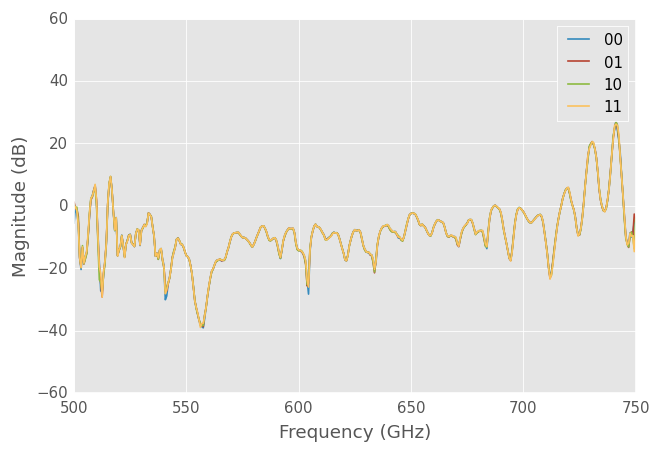

In [11]:
[c.error_ntwk_of((m,n)).plot_s_db(0,1, label='%i%i'%(m,n)) for m in range(c.rank) for n in range(c.rank)]

[None, None, None, None]

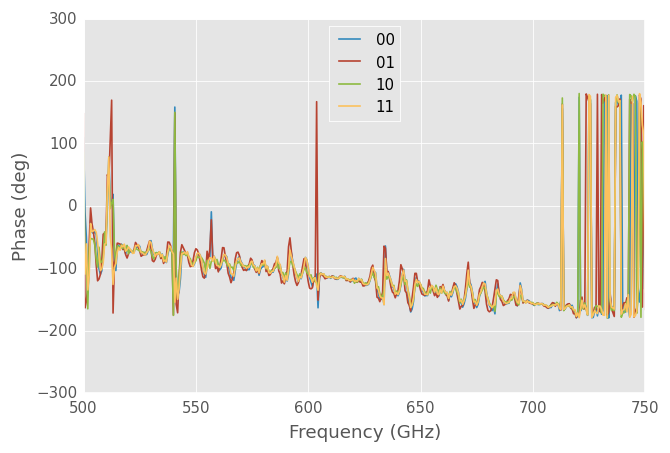

In [12]:
[c.cor_ntwk_of((m,n),'ds,5').plot_s_deg( label='%i%i'%(m,n)) for m in range(c.rank) for n in range(c.rank)]

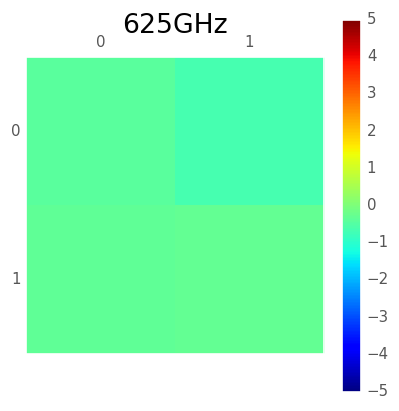

In [16]:
c.interact_cor_cube('ds,5', clims=(-5,5))